In [1]:
#Importing all libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#loading dataset
mnist = tf.keras.datasets.mnist

In [3]:
#partintioning testing and training data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 50s 4us/step


In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
#Creating model
model = tf.keras.models.Sequential()

In [7]:
#Adding model layers
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

In [8]:
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [11]:
#Compileing Model
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Training Model
model.fit(x_train, y_train, epochs = 3)
#Saving in handwritten.model file
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 13s 4ms/step - loss: 0.2609 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9659
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0727 - accuracy: 0.9765
INFO:tensorflow:Assets written to: handwritten.model\assets


In [13]:
#load the model
model = tf.keras.models.load_model('handwritten.model')

In [14]:
#Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9700
0.09942179918289185
0.9700000286102295


1/1 [==============================] - 0s 45ms/step
This digit is probably a 1


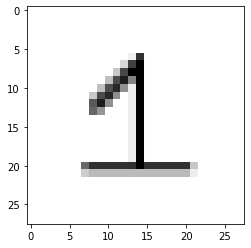

1/1 [==============================] - 0s 17ms/step
This digit is probably a 2


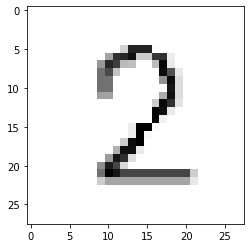

1/1 [==============================] - 0s 16ms/step
This digit is probably a 3


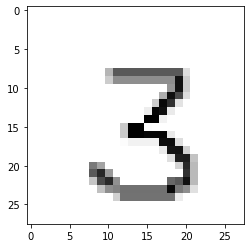

1/1 [==============================] - 0s 17ms/step
This digit is probably a 4


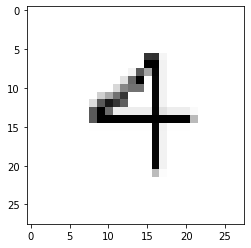

1/1 [==============================] - 0s 17ms/step
This digit is probably a 9


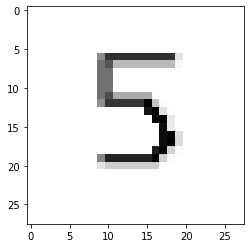

1/1 [==============================] - 0s 17ms/step
This digit is probably a 2


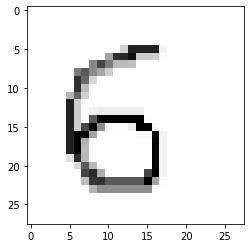

1/1 [==============================] - 0s 17ms/step
This digit is probably a 7


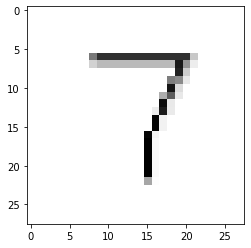

1/1 [==============================] - 0s 16ms/step
This digit is probably a 6


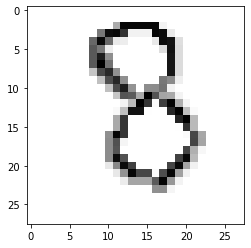

1/1 [==============================] - 0s 17ms/step
This digit is probably a 9


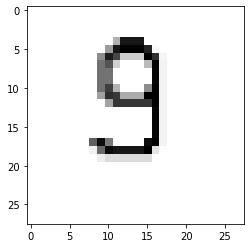

1/1 [==============================] - 0s 16ms/step
This digit is probably a 9


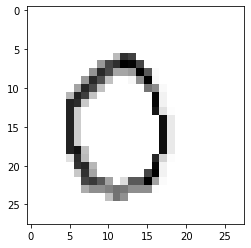

In [25]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1